# Interpolation

Interpolation은 이산적인 데이터 포인트들을 연결하는 함수를 만드는 과정이다.

In [1]:
from scipy import interpolate
from numpy import polynomial as P
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

### Polynomials

계수를 이용해 다항식을 정의하는 방법

다항식을 구현하는 ```numpy.poly1d```라는 다소 오래 된 모듈도 있는데, ```numpy.polynomial``` 모듈을 사용하는 것을 추천한다.

In [2]:
p1 = P.Polynomial([1,2,3])
p1

Polynomial([1., 2., 3.], domain=[-1,  1], window=[-1,  1])

In [3]:
print(p1)

1.0 + 2.0 x**1 + 3.0 x**2


In [4]:
repr(p1)

'Polynomial([1., 2., 3.], domain=[-1,  1], window=[-1,  1])'

근을 이용해 다항식을 정의하는 방법

In [5]:
p2 = P.Polynomial.fromroots([-1, 1])
p2

Polynomial([-1.,  0.,  1.], domain=[-1.,  1.], window=[-1.,  1.])

In [6]:
print(p2)

-1.0 + 0.0 x**1 + 1.0 x**2


In [7]:
repr(p2)

'Polynomial([-1.,  0.,  1.], domain=[-1.,  1.], window=[-1.,  1.])'

다항식의 해는 ```roots``` method를 이용해 계산할 수 있다.

In [8]:
p1.roots()

array([-0.33333333-0.47140452j, -0.33333333+0.47140452j])

In [9]:
p2.roots()

array([-1.,  1.])

In [10]:
p1.coef

array([1., 2., 3.])

In [11]:
p1.domain

array([-1,  1])

In [12]:
p1.window

array([-1,  1])

다항식의 $x$에 값을 대입하여 계산하기

In [13]:
p1(np.array([1.5, 2.5, 3.5]))

array([10.75, 24.75, 44.75])

```Polynomial``` 객체는 기본적인 산술 연산을 적용할 수 있다. 

In [14]:
p1 + p2

Polynomial([0., 2., 4.], domain=[-1.,  1.], window=[-1.,  1.])

In [15]:
p2 / 5

Polynomial([-0.2,  0. ,  0.2], domain=[-1.,  1.], window=[-1.,  1.])

In [16]:
p1 = P.Polynomial.fromroots([1, 2, 3])

In [17]:
p1

Polynomial([-6., 11., -6.,  1.], domain=[-1.,  1.], window=[-1.,  1.])

In [18]:
p2 = P.Polynomial.fromroots([2])

In [19]:
p3 = p1 // p2

In [20]:
p3

Polynomial([ 3., -4.,  1.], domain=[-1.,  1.], window=[-1.,  1.])

In [21]:
p3.roots()

array([1., 3.])

domain과 window를 다르게 설정하면 domain -> window로 linear transformation을 취함

In [22]:
P.Polynomial( [0, 0, 1], domain=[0, 1], window=[0, 2] )

Polynomial([0., 0., 1.], domain=[0., 1.], window=[0., 2.])

In [23]:
P.Polynomial( [0, 0, 1], domain=[0, 1], window=[1, 2] )

Polynomial([0., 0., 1.], domain=[0., 1.], window=[1., 2.])

기본 다항식 외에도 다른 base를 바탕으로 하는 다항식들이 구현되어 있다.

Chevyshev 다항식 :

$$ T_0(x) = 1, \quad T_1(x) = x, \quad T_{n+1}(x) = 2 x T_n(x) - T_{n-1} (x) $$

In [24]:
P.Chebyshev([1])

Chebyshev([1.], domain=[-1,  1], window=[-1,  1])

In [25]:
P.Chebyshev([0, 1])

Chebyshev([0., 1.], domain=[-1,  1], window=[-1,  1])

In [26]:
P.Chebyshev([0, 1])(5)

5.0

In [27]:
c1 = P.Chebyshev([1, 2, 3])
c1

Chebyshev([1., 2., 3.], domain=[-1,  1], window=[-1,  1])

In [28]:
c1.roots()

array([-0.76759188,  0.43425855])

In [29]:
c = P.Chebyshev.fromroots([-1, 1])
c

Chebyshev([-0.5,  0. ,  0.5], domain=[-1.,  1.], window=[-1.,  1.])

In [30]:
P.Chebyshev.basis(1)

Chebyshev([0., 1.], domain=[-1.,  1.], window=[-1.,  1.])

In [31]:
repr(P.Chebyshev.basis(1))

'Chebyshev([0., 1.], domain=[-1.,  1.], window=[-1.,  1.])'

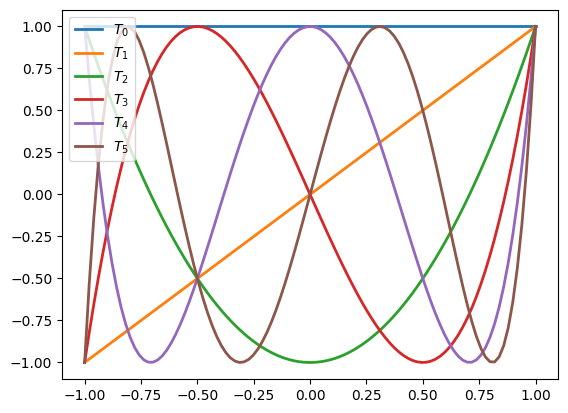

In [32]:
import matplotlib.pyplot as plt
x = np.linspace(-1, 1, 100)

for i in range(6):
    ax = plt.plot(x, P.Chebyshev.basis(i)(x), lw=2, label=f"$T_{i}$")

plt.legend(loc="upper left")
plt.show()

Legendre polynomial:

$$ P_0(x) = 1, \quad \int_{-1}^{1} P_m(x) P_n(x) d x = 0 \text{ if } n \neq m $$

In [33]:
P.Legendre(1)

Legendre([1.], domain=[-1,  1], window=[-1,  1])

In [34]:
P.Legendre([0,1])

Legendre([0., 1.], domain=[-1,  1], window=[-1,  1])

In [35]:
l = P.Legendre.fromroots([-1, 1])
l

Legendre([-0.66666667,  0.        ,  0.66666667], domain=[-1.,  1.], window=[-1.,  1.])

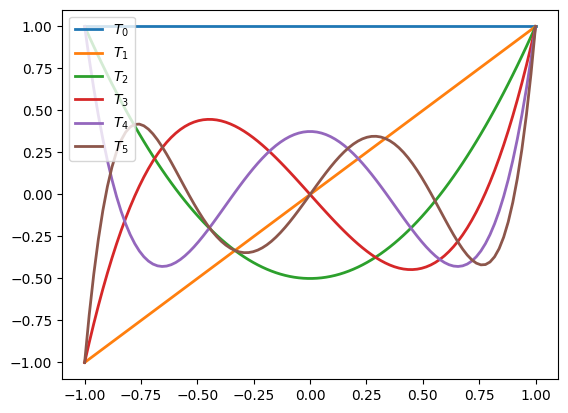

In [36]:
import matplotlib.pyplot as plt
x = np.linspace(-1, 1, 100)

for i in range(6):
    ax = plt.plot(x, P.Legendre.basis(i)(x), lw=2, label=f"$T_{i}$")

plt.legend(loc="upper left")
plt.show()

In [37]:
c = P.Chebyshev.fromroots([-0.8,-0.4, 0, 0.2, 0.9 ])
c

Chebyshev([-0.0305,  0.0676, -0.018 ,  0.1075,  0.0125,  0.0625], domain=[-1.,  1.], window=[-1.,  1.])

In [38]:
l = P.Legendre.fromroots([-0.8, -0.4, 0, 0.2, 0.9])
l

Legendre([-0.02533333, -0.00582857, -0.03352381,  0.11644444,  0.02285714,
        0.12698413], domain=[-1.,  1.], window=[-1.,  1.])

```c```와 ```l```은 같은 식이다.

In [39]:
c(np.array([0.5, 1.5, 2.5]))

array([-7.0200e-02,  5.1129e+00,  8.8044e+01])

In [40]:
l(np.array([0.5, 1.5, 2.5]))

array([-7.0200e-02,  5.1129e+00,  8.8044e+01])

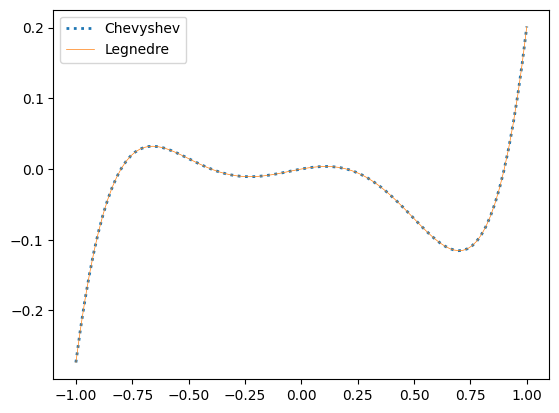

In [41]:
import matplotlib.pyplot as plt
x = np.linspace(-1, 1, 100)

ax = plt.plot(x, c(x), lw=2, linestyle=":", label="Chevyshev")
ax = plt.plot(x, l(x), lw=0.5, label="Legnedre")

plt.legend(loc="upper left")
plt.show()

### Polynomial interpolation

앞에서 살펴본 다항식들은 interpolation에 유용하게 사용할 수 있다.

주어진 데이터셋 $\{ (x_i, y_i) \}_{i=0}^{n-1}$에 대해 $f(x_i) = f(y_i)$를 만족하는 $f$를 찾아야 한다.

아래의 포인트들을 연결해야 하는 점들이라고 간주하자.

In [42]:
x = np.array([1, 2, 3, 4])
y = np.array([1, 3, 5, 4])

일반적으로 basis function이라 불리우는 $\phi_j(x)$에 대해 
$$ f(x) = \sum_{j=0}^{n-1} c_j \phi_j(x) $$
를 만족하는 $c_j$들을 찾는 문제로 변형한다.

$\phi_j(x)$에 대한 일반적인 선택은 다항식들이다.

만약 
$$\phi_0(x) = 1, \quad \phi_1(x) = x, \quad \phi_2(x) = x^2,  \quad \phi_3(x) = x^3, \cdots$$

를 basis로 하는 일반 다항식을 이용하려면 먼저 ```P.polynomial.polyvander```를 구한다.

$$ \begin{bmatrix} 
\phi_0(x_1) &  \phi_1(x_1) &  \phi_2(x_1) &  \phi_3(x_1) \\
\phi_0(x_2) &  \phi_1(x_2) &  \phi_2(x_2) &  \phi_3(x_2) \\
\phi_0(x_3) &  \phi_1(x_3) &  \phi_2(x_3) &  \phi_3(x_3) \\
\phi_0(x_4) &  \phi_1(x_4) &  \phi_2(x_4) &  \phi_3(x_4) 
\end{bmatrix} $$

In [43]:
deg = len(x) - 1
A = P.polynomial.polyvander(x, deg)
A

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.],
       [ 1.,  4., 16., 64.]])

그 다음, 아래 식을 만족하는 $c$를 찾는다.

$$ \begin{bmatrix} 
\phi_0(x_1) &  \phi_1(x_1) &  \phi_2(x_1) &  \phi_3(x_1) \\
\phi_0(x_2) &  \phi_1(x_2) &  \phi_2(x_2) &  \phi_3(x_2) \\
\phi_0(x_3) &  \phi_1(x_3) &  \phi_2(x_3) &  \phi_3(x_3) \\
\phi_0(x_4) &  \phi_1(x_4) &  \phi_2(x_4) &  \phi_3(x_4) 
\end{bmatrix}  c = y$$

In [44]:
c = linalg.solve(A, y)
c

array([ 2. , -3.5,  3. , -0.5])

In [45]:
f1 = P.Polynomial(c)
f1

Polynomial([ 2. , -3.5,  3. , -0.5], domain=[-1,  1], window=[-1,  1])

In [46]:
f1(x)

array([1., 3., 5., 4.])

In [47]:
f1(2.5)

4.1875

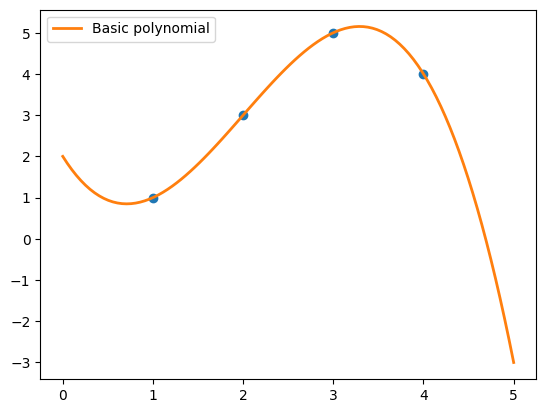

In [48]:
import matplotlib.pyplot as plt
xs = np.linspace(0, 5, 100)

ax = plt.plot(x, y, 'o') 
ax = plt.plot(xs, f1(xs), lw=2,  label="Basic polynomial")
#ax = plt.plot(x, l(x), lw=0.5, label="Legnedre")

plt.legend(loc="upper left")
plt.show()

#### Chevyshev 다항식을 이용한 interpolation

이번에는 
$$\phi_0(x) = 1, \quad \phi_1(x) = x, \quad \phi_2(x) = T_2(x),  \quad \phi_3(x) = T_3(x), \cdots$$

를 basis로 하는 Chevyshev 다항식을 이용한다. 

In [49]:
A = P.chebyshev.chebvander(x, deg)
A

array([[  1.,   1.,   1.,   1.],
       [  1.,   2.,   7.,  26.],
       [  1.,   3.,  17.,  99.],
       [  1.,   4.,  31., 244.]])

In [50]:
c = linalg.solve(A, y)
c

array([ 3.5  , -3.875,  1.5  , -0.125])

In [51]:
f2 = P.Chebyshev(c)
f2

Chebyshev([ 3.5  , -3.875,  1.5  , -0.125], domain=[-1,  1], window=[-1,  1])

In [52]:
f2(x)

array([1., 3., 5., 4.])

In [53]:
f2(2.5)

4.1875

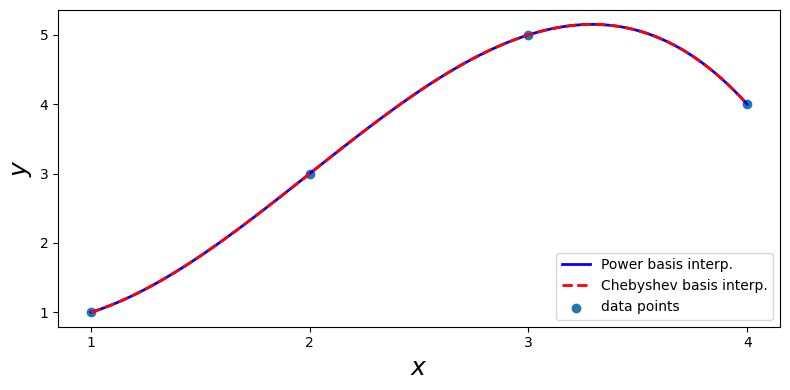

In [54]:
xx = np.linspace(x.min(), x.max(), 100)

fig, ax = plt.subplots(1, 1, figsize=(8, 4))

ax.plot(xx, f1(xx), 'b', lw=2, label='Power basis interp.')
ax.plot(xx, f2(xx), 'r--', lw=2, label='Chebyshev basis interp.')
ax.scatter(x, y, label='data points')

ax.legend(loc=4)
ax.set_xticks(x)
ax.set_ylabel(r"$y$", fontsize=18)
ax.set_xlabel(r"$x$", fontsize=18)

fig.tight_layout()

```fit``` method를 이용하면 더욱 간편하다.

```fit``` method는 least square를 이용해 data에 fitting 하기 위한 method이지만, ```deg```에 따라 interpolation에 이용할 수 있다.

In [55]:
f1b = P.Polynomial.fit(x, y, deg)
f1b

Polynomial([ 4.1875,  3.1875, -1.6875, -1.6875], domain=[1., 4.], window=[-1.,  1.])

In [56]:
repr(f1b)

'Polynomial([ 4.1875,  3.1875, -1.6875, -1.6875], domain=[1., 4.], window=[-1.,  1.])'

In [57]:
f2b = P.Chebyshev.fit(x, y, deg)
f2b

Chebyshev([ 3.34375 ,  1.921875, -0.84375 , -0.421875], domain=[1., 4.], window=[-1.,  1.])

In [58]:
repr(f2b)

'Chebyshev([ 3.34375 ,  1.921875, -0.84375 , -0.421875], domain=[1., 4.], window=[-1.,  1.])'

```domain=[1., 4.]```으로 자동으로 설정되는 것을 볼 수 있다.

```window=[-1.,  1.]```이기 때문에, domain-to-window의 linear transformation을 취한다.

$$ (2x-5)/3.0 =  -1.6666666666666667+0.6666666666666666x $$

In [59]:
# [1., 4.]의 domain을 [-1, 1]의 window로
(2*x-5)/3.0

array([-1.        , -0.33333333,  0.33333333,  1.        ])

```np.linalg.cond```는 민감도를 체크하는데, ```(2*x-5)/3.0```를 취하였을 때 민감도가 훨씬 적은 것을 볼 수 있다.

In [60]:
np.linalg.cond(P.chebyshev.chebvander(x, deg))

4659.738424139918

In [61]:
np.linalg.cond(P.chebyshev.chebvander((2*x-5)/3.0, deg))

1.8542033440472891

degree를 적게 설정하면 least square fitting이 된다.

In [62]:
f1 = P.Polynomial.fit(x, y, 1)
f2 = P.Polynomial.fit(x, y, 2)
f3 = P.Polynomial.fit(x, y, 3)

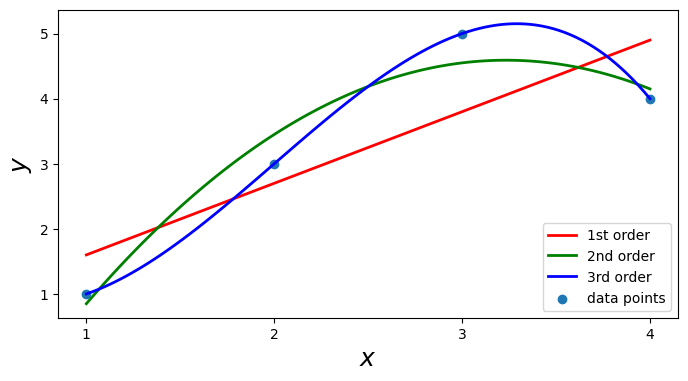

In [63]:
xx = np.linspace(x.min(), x.max(), 100)

fig, ax = plt.subplots(1, 1, figsize=(8, 4))

ax.plot(xx, f1(xx), 'r', lw=2, label='1st order')
ax.plot(xx, f2(xx), 'g', lw=2, label='2nd order')
ax.plot(xx, f3(xx), 'b', lw=2, label='3rd order')
ax.scatter(x, y, label='data points')

ax.legend(loc=4)
ax.set_xticks(x)
ax.set_ylabel(r"$y$", fontsize=18)
ax.set_xlabel(r"$x$", fontsize=18);

In [64]:
c1 = P.Chebyshev.fit(x, y, 1)
c2 = P.Chebyshev.fit(x, y, 2)
c3 = P.Chebyshev.fit(x, y, 3)

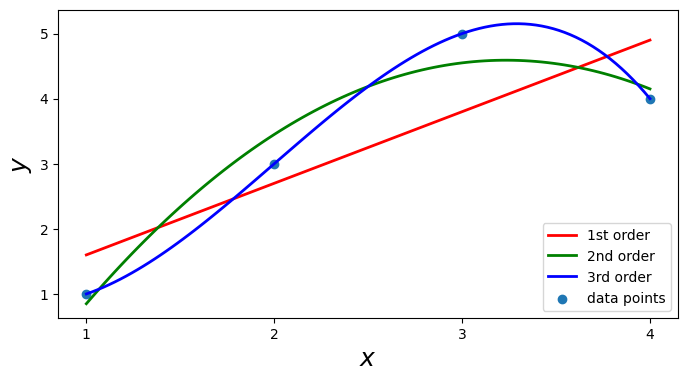

In [65]:
xx = np.linspace(x.min(), x.max(), 100)

fig, ax = plt.subplots(1, 1, figsize=(8, 4))

ax.plot(xx, c1(xx), 'r', lw=2, label='1st order')
ax.plot(xx, c2(xx), 'g', lw=2, label='2nd order')
ax.plot(xx, c3(xx), 'b', lw=2, label='3rd order')
ax.scatter(x, y, label='data points')

ax.legend(loc=4)
ax.set_xticks(x)
ax.set_ylabel(r"$y$", fontsize=18)
ax.set_xlabel(r"$x$", fontsize=18);

### Runge problem

데이터 포인트의 수가 많아지면 interpolation을 위해 높은 degree가 필요하다.

높은 차수의 다항식 interpolation은 계산의 복잡도도 높이지만, 주어진 데이터 포인트가 아닌 다른 영역에서 불필요하게 과도한 움직임을 보일 수 있다.

In [66]:
def runge(x):
    return 1/(1 + 25 * x**2)

In [67]:
def runge_interpolate(n):
    x = np.linspace(-1, 1, n+1)
    p = P.Polynomial.fit(x, runge(x), deg=n)
    return x, p

In [68]:
xx = np.linspace(-1, 1, 250)

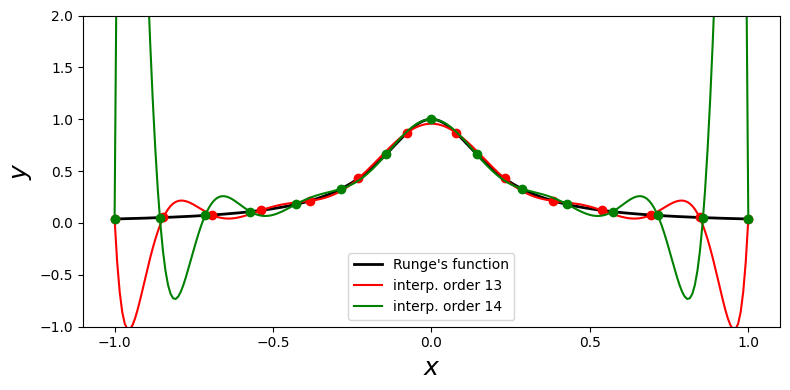

In [69]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

ax.plot(xx, runge(xx), 'k', lw=2, label="Runge's function")

n = 13
x, p = runge_interpolate(n)
ax.plot(x, runge(x), 'ro')
ax.plot(xx, p(xx), 'r', label='interp. order %d' % n)

n = 14
x, p = runge_interpolate(n)
ax.plot(x, runge(x), 'go')
ax.plot(xx, p(xx), 'g', label='interp. order %d' % n)

ax.legend(loc=8)
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1, 2)
ax.set_xticks([-1, -0.5, 0, 0.5, 1])
ax.set_ylabel(r"$y$", fontsize=18)
ax.set_xlabel(r"$x$", fontsize=18)

fig.tight_layout()

### Spline interpolation

Spline은 일종의 piecewise polynomial interpolation이라고 볼 수 있다.  

즉, $(x_{i-1}, y_{i-1})$과 $(x_{i}, y_{i})$를 연결하는 다항식 $q_i$들을 찾는다.

만약 3차 이상의 다항식을 이용한다면, 각 $x_i$의 양쪽에서 interpolation되는 다항식을 각각 $q_i$와 $q_{i+1}$이라 할 때, 이 다항식들의 $x_i$에서의 일차 미분과 이차 미분값이 같도록 할 수 있다.

Scipy의 ```interpolate``` 모듈은 spline interpolation을 위한 함수와 클래스들을 제공한다. 

대표적으로 ```interpolate.interp1d``` 함수는 $x$와 $y$를 인자로 받아, spline interpolation을 진행한다.  

```interpolate.interp1d```의 ```kind``` 인자는 다항식의 차수를 지정한다.   

In [70]:
x = np.linspace(-1, 1, 11)
y = runge(x)
f = interpolate.interp1d(x, y, kind=3)
f

In [71]:
f(0.5)

array(0.14013505)

In [72]:
f([0.2, 0.3])

array([0.5       , 0.29733288])

In [73]:
f(x)

array([0.03846154, 0.05882353, 0.1       , 0.2       , 0.5       ,
       1.        , 0.5       , 0.2       , 0.1       , 0.05882353,
       0.03846154])

In [74]:
y

array([0.03846154, 0.05882353, 0.1       , 0.2       , 0.5       ,
       1.        , 0.5       , 0.2       , 0.1       , 0.05882353,
       0.03846154])

In [75]:
xx = np.linspace(-1, 1, 100)

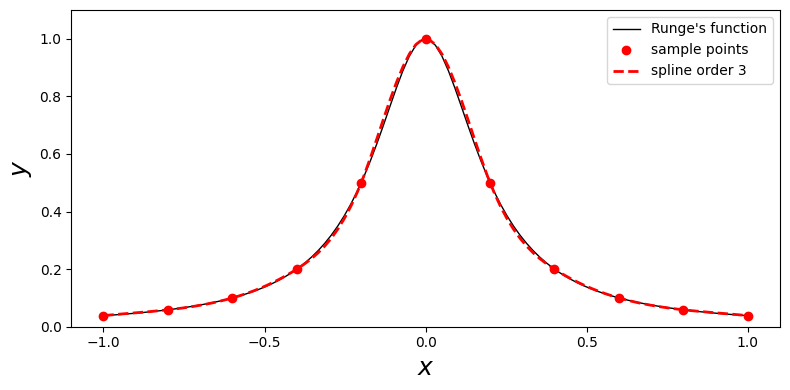

In [76]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(xx, runge(xx), 'k', lw=1, label="Runge's function")
ax.plot(x, y, 'ro', label='sample points')
ax.plot(xx, f(xx), 'r--', lw=2, label='spline order 3')

ax.legend()
ax.set_ylim(0, 1.1)
ax.set_xticks([-1, -0.5, 0, 0.5, 1])
ax.set_ylabel(r"$y$", fontsize=18)
ax.set_xlabel(r"$x$", fontsize=18)

fig.tight_layout()

다양한 차수에 의한 spline 비교

In [77]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7])
y = np.array([3, 4, 3.5, 2, 1, 1.5, 1.25, 0.9])
xx = np.linspace(x.min(), x.max(), 100)

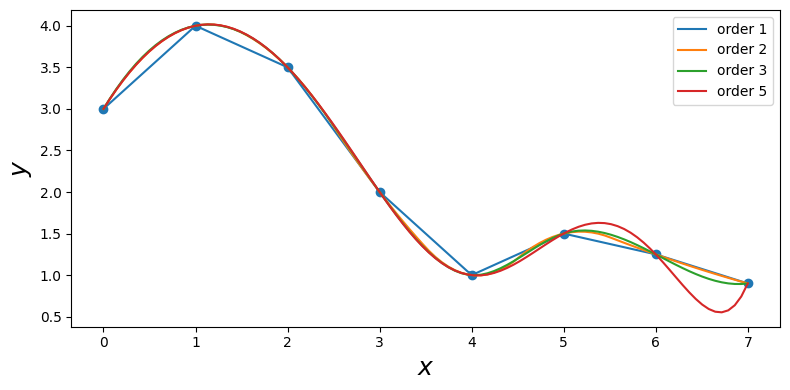

In [78]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.scatter(x, y)

for n in [1, 2, 3, 5]:
    f = interpolate.interp1d(x, y, kind=n)
    ax.plot(xx, f(xx), label='order %d' % n)

ax.legend()
ax.set_ylabel(r"$y$", fontsize=18)
ax.set_xlabel(r"$x$", fontsize=18)

fig.tight_layout()

2차 혹은 3차 다항식에서 이미 좋은 interpolation을 보이고, 5차는 오히려 좋아보이지 않는다.

그 외의 example들

In [79]:
x = np.linspace(0, 10, 10)
y = np.cos(-x**2/8.0)
f = interpolate.interp1d(x, y)
f2 = interpolate.interp1d(x, y, kind='cubic')

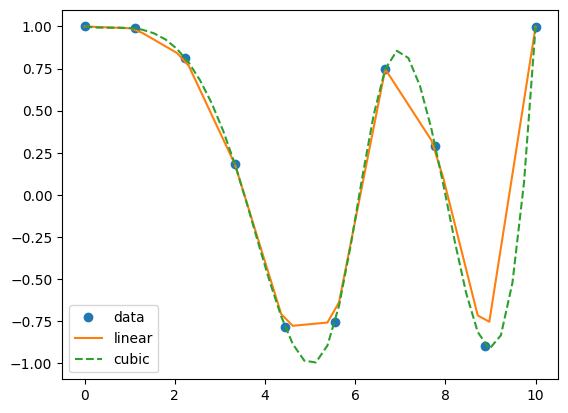

In [80]:
xnew = np.linspace(0, 10, 40)
import matplotlib.pyplot as plt
plt.plot(x,y,'o',xnew,f(xnew),'-', xnew, f2(xnew),'--')
plt.legend(['data', 'linear', 'cubic'], loc='best')
plt.show()

## Multivariate interpolation

단일 변수 interpolation은 다변수 interpolation으로 확장할 수 있다. 

이변수 interpolation으로 ```interpolate.interp2d```와 ```interpolate.griddata``` 함수가 이용된다.  

In [81]:
x = y = np.linspace(-2, 2, 10)

In [82]:
def f(x, y):
    return np.exp(-(x + .5)**2 - 2*(y + .5)**2) - np.exp(-(x - .5)**2 - 2*(y - .5)**2)

In [83]:
X, Y = np.meshgrid(x, y)
#simulate noisy data
Z = f(X, Y) + 0.05 * np.random.randn(*X.shape)  # * is used for unpacking
Z

array([[-0.0477792 ,  0.00277062,  0.05956478,  0.04773815,  0.0309144 ,
        -0.08391377,  0.02038395, -0.05262462,  0.056976  ,  0.05386655],
       [ 0.0484333 ,  0.07030226,  0.11214008,  0.15364806,  0.17977655,
         0.06789376,  0.04845867,  0.03659235,  0.0311555 ,  0.0770577 ],
       [-0.02745979,  0.13180774,  0.275732  ,  0.44421734,  0.41188906,
         0.27028834,  0.13589315, -0.03932813, -0.0100121 ,  0.03104755],
       [ 0.02674235,  0.28224262,  0.63748475,  0.93870425,  0.81972706,
         0.51064936,  0.17412588,  0.01323413,  0.02357991, -0.09045772],
       [ 0.10811309,  0.24474886,  0.57409593,  0.82553644,  0.59849079,
         0.21328259, -0.11341664, -0.12475324, -0.14991135, -0.09279137],
       [ 0.03165755,  0.15452163,  0.11176902,  0.13658592, -0.20094305,
        -0.61759561, -0.70602431, -0.64134641, -0.25959823, -0.11127207],
       [ 0.00590375,  0.03633982,  0.07119635, -0.21710839, -0.49170389,
        -0.82050674, -0.87825344, -0.58415982

In [84]:
f_interp = interpolate.interp2d(x, y, Z, kind='cubic')

In [95]:
f_interp

scipy.interpolate._interpolate.interp2d

In [96]:
f_interp(0.11, 0.2)

array([-0.50329833])

```ZZi```는 interpolation을 통해 더 촘촘한 grid 위에서 계산되었다.

In [87]:
xx = yy = np.linspace(x.min(), x.max(), 100)
XX, YY = np.meshgrid(xx, yy)

ZZi = f_interp(xx, yy)
ZZi

array([[-0.0477792 , -0.04701937, -0.04518576, ...,  0.08721629,
         0.07304058,  0.05386655],
       [-0.02150164, -0.02262888, -0.02254013, ...,  0.08303407,
         0.07174237,  0.05656842],
       [ 0.00037665, -0.00218128, -0.00343448, ...,  0.07941959,
         0.0708348 ,  0.0593458 ],
       ...,
       [-0.01405594, -0.01026417, -0.00705409, ..., -0.0343772 ,
        -0.04829942, -0.06463673],
       [-0.00288138, -0.00076773,  0.0008385 , ..., -0.00607138,
        -0.01968013, -0.03661573],
       [ 0.01051189,  0.01011164,  0.00936979, ...,  0.0274866 ,
         0.01493716, -0.00192511]])

왼쪽 그림은 원래 함수 $f$의 값을 이용하여 그렸고, 오른쪽은 noisy data와 그를 통해 계산된 intepolation을 바탕으로 그렸다.

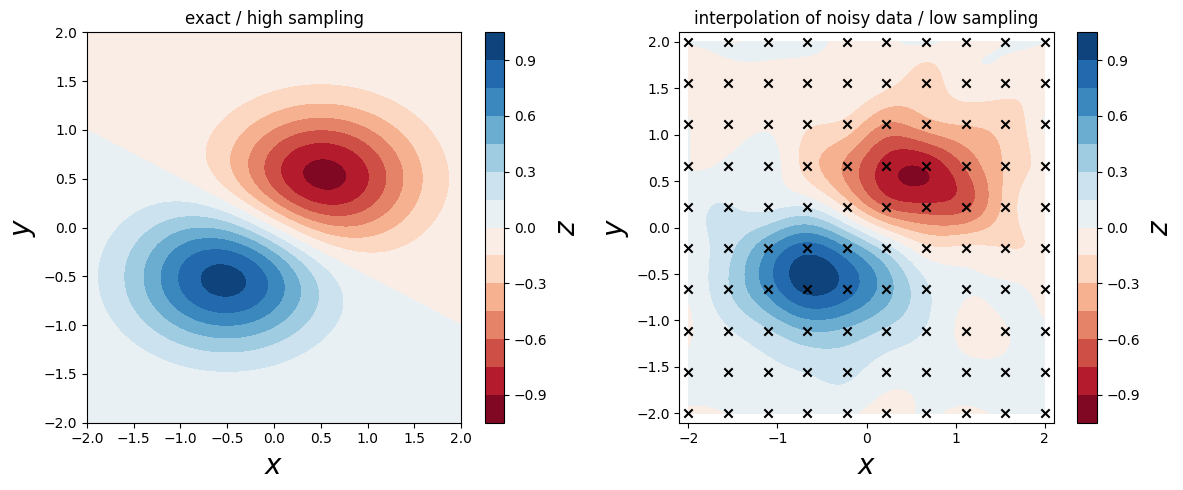

In [88]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

c = axes[0].contourf(XX, YY, f(XX, YY), 15, cmap=plt.cm.RdBu)
axes[0].set_xlabel(r"$x$", fontsize=20)
axes[0].set_ylabel(r"$y$", fontsize=20)
axes[0].set_title("exact / high sampling")
cb = fig.colorbar(c, ax=axes[0])
cb.set_label(r"$z$", fontsize=20)

c = axes[1].contourf(XX, YY, ZZi, 15, cmap=plt.cm.RdBu)
axes[1].set_ylim(-2.1, 2.1)
axes[1].set_xlim(-2.1, 2.1)
axes[1].set_xlabel(r"$x$", fontsize=20)
axes[1].set_ylabel(r"$y$", fontsize=20)
axes[1].scatter(X, Y, marker='x', color='k')
axes[1].set_title("interpolation of noisy data / low sampling")
cb = fig.colorbar(c, ax=axes[1])
cb.set_label(r"$z$", fontsize=20)

fig.tight_layout()

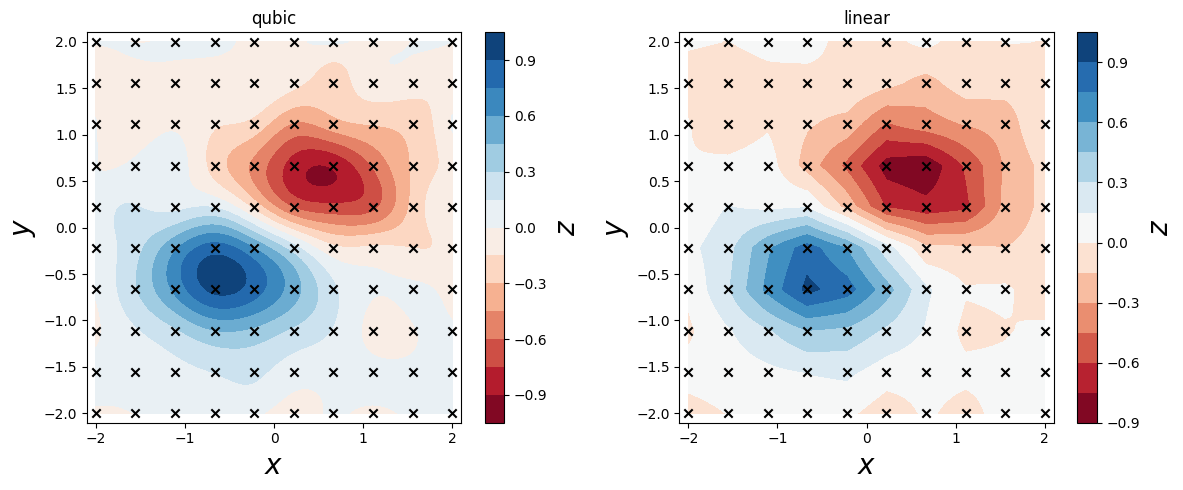

In [89]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

ax = axes[0]
c = ax.contourf(XX, YY, ZZi, 15, cmap=plt.cm.RdBu)
ax.set_ylim(-2.1, 2.1)
ax.set_xlim(-2.1, 2.1)
ax.set_xlabel(r"$x$", fontsize=20)
ax.set_ylabel(r"$y$", fontsize=20)
ax.scatter(X, Y, marker='x', color='k')
ax.set_title("qubic")

cb = fig.colorbar(c, ax=ax)
cb.set_label(r"$z$", fontsize=20)


# linear 
f_interp_linear = interpolate.interp2d(x, y, Z, kind='linear')
ZZi_linear =  f_interp_linear(xx, yy)

ax = axes[1]

c = ax.contourf(XX, YY, ZZi_linear, 15, cmap=plt.cm.RdBu)
ax.set_ylim(-2.1, 2.1)
ax.set_xlim(-2.1, 2.1)
ax.set_xlabel(r"$x$", fontsize=20)
ax.set_ylabel(r"$y$", fontsize=20)
ax.scatter(X, Y, marker='x', color='k')
cb = fig.colorbar(c, ax=ax)
cb.set_label(r"$z$", fontsize=20)
ax.set_title("linear")

fig.tight_layout()

### Irregular grid

Sample된 데이터가 irregular한 grid에서 얻어졌을 경우, 이를 regular한 grid 상으로 변환하여 살펴볼 필요가 있다.  

이 때 활용될 수 있는 함수가 ```interpolate.griddata```이다.  

In [90]:
x = y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)
def f(x, y):
    return np.exp(-x**2 - y**2) * np.cos(4*x) * np.sin(6*y)
Z = f(X, Y)

```xdata```와 ```ydata```가 랜덤하게 선택됨

In [91]:
N = 500
xdata = np.random.uniform(-1, 1, N)
ydata = np.random.uniform(-1, 1, N)
zdata = f(xdata, ydata)

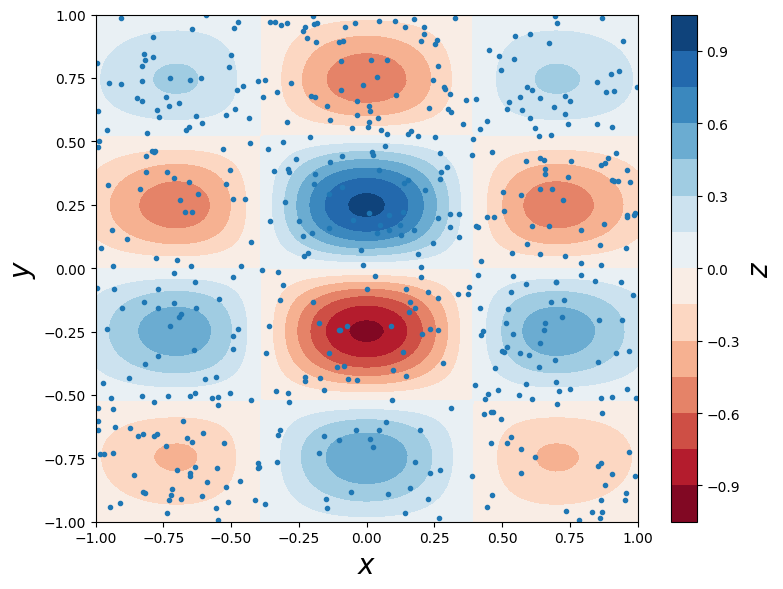

In [92]:
fig, ax = plt.subplots(figsize=(8, 6))
c = ax.contourf(X, Y, Z, 15, cmap=plt.cm.RdBu);
ax.scatter(xdata, ydata, marker='.')
ax.set_ylim(-1,1)
ax.set_xlim(-1,1)
ax.set_xlabel(r"$x$", fontsize=20)
ax.set_ylabel(r"$y$", fontsize=20)

cb = fig.colorbar(c, ax=ax)
cb.set_label(r"$z$", fontsize=20)

fig.tight_layout()

In [93]:
def z_interpolate(xdata, ydata, zdata):
    Zi_0 = interpolate.griddata((xdata, ydata), zdata, (X, Y), method='nearest')
    Zi_1 = interpolate.griddata((xdata, ydata), zdata, (X, Y), method='linear')
    Zi_3 = interpolate.griddata((xdata, ydata), zdata, (X, Y), method='cubic')
    return Zi_0, Zi_1, Zi_3

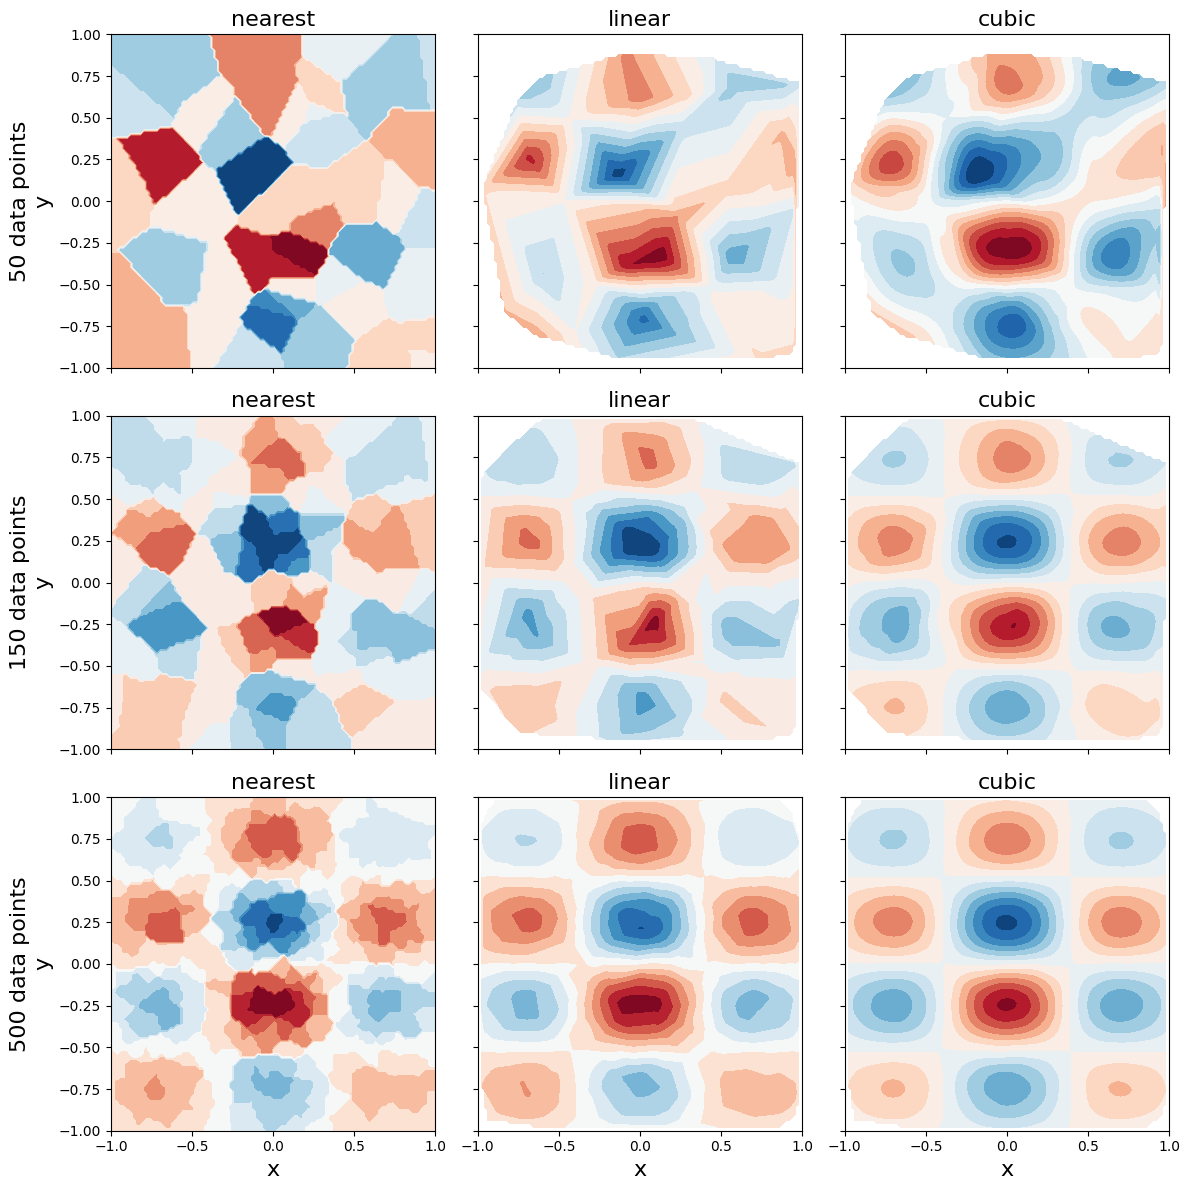

In [94]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12), sharex=True, sharey=True)

n_vec = [50, 150, 500]

for idx, n in enumerate(n_vec):
    Zi_0, Zi_1, Zi_3 = z_interpolate(xdata[:n], ydata[:n], zdata[:n])
    axes[idx, 0].contourf(X, Y, Zi_0, 15, cmap=plt.cm.RdBu)
    axes[idx, 0].set_ylabel("%d data points\ny" % n, fontsize=16)
    axes[idx, 0].set_title("nearest", fontsize=16)
    axes[idx, 1].contourf(X, Y, Zi_1, 15, cmap=plt.cm.RdBu)
    axes[idx, 1].set_title("linear", fontsize=16)
    axes[idx, 2].contourf(X, Y, Zi_3, 15, cmap=plt.cm.RdBu)
    axes[idx, 2].set_title("cubic", fontsize=16)

for m in range(len(n_vec)):
    axes[idx, m].set_xlabel("x", fontsize=16)
    
fig.tight_layout()